In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','JNJ']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','JNJ']

#It is annual data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN,JNJ]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","J&J"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

c:\Users\FORAM\anaconda\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-01-25,159.000000,159.619995,158.470001,159.559998,159.559998,5478900,J&J
2024-01-26,160.429993,160.740005,159.360001,159.500000,159.500000,5591900,J&J
2024-01-29,159.009995,160.070007,158.960007,159.360001,159.360001,6483200,J&J
2024-01-30,159.350006,159.759995,158.130005,158.770004,158.770004,7200500,J&J
2024-01-31,160.399994,160.619995,158.669998,158.899994,158.899994,8256800,J&J
2024-02-01,158.160004,158.490005,157.050003,158.360001,158.360001,8012000,J&J
2024-02-02,157.970001,158.309998,155.940002,156.610001,156.610001,8295500,J&J
2024-02-05,156.610001,156.889999,155.339996,155.800003,155.800003,9121600,J&J
2024-02-06,155.830002,158.729996,155.600006,158.059998,158.059998,9229900,J&J


## SMA 
The simple moving average is the unweighted mean of the previous M data points. The selection of M (sliding window) depends on the amount of smoothing desired since increasing the value of M improves the smoothing at the expense of accuracy.

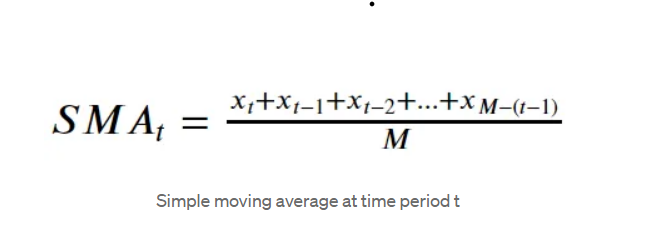

In [4]:
MA_day = [10,20,30,40,100]

#company_list is list of indivisual variables of companies 
#company is each single comapny

for ma in MA_day:
    for company in company_list:
        column_name = f'SMA_{ma}'
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
company.head(10)

df = company

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name,SMA_10,SMA_20,SMA_30,SMA_40,SMA_100
Date,,,,,,,,,,,,
2023-02-08,163.300003,164.559998,162.899994,163.610001,158.791458,6054700,J&J,NaN,NaN,NaN,NaN,NaN
2023-02-09,163.630005,164.800003,161.070007,161.399994,156.646530,7949500,J&J,NaN,NaN,NaN,NaN,NaN
2023-02-10,161.770004,162.789993,161.350006,162.149994,157.374435,7028000,J&J,NaN,NaN,NaN,NaN,NaN
2023-02-13,161.330002,162.820007,161.149994,162.750000,157.956787,6414700,J&J,NaN,NaN,NaN,NaN,NaN
2023-02-14,162.740005,162.970001,161.759995,162.039993,157.267685,6316000,J&J,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,158.160004,158.490005,157.050003,158.360001,158.360001,8012000,J&J,159.737000,160.493000,159.221334,158.375500,155.437584
2024-02-02,157.970001,158.309998,155.940002,156.610001,156.610001,8295500,J&J,159.230000,160.292000,159.226334,158.327000,155.390006
2024-02-05,156.610001,156.889999,155.339996,155.800003,155.800003,9121600,J&J,158.563000,160.025500,159.310667,158.306501,155.325202


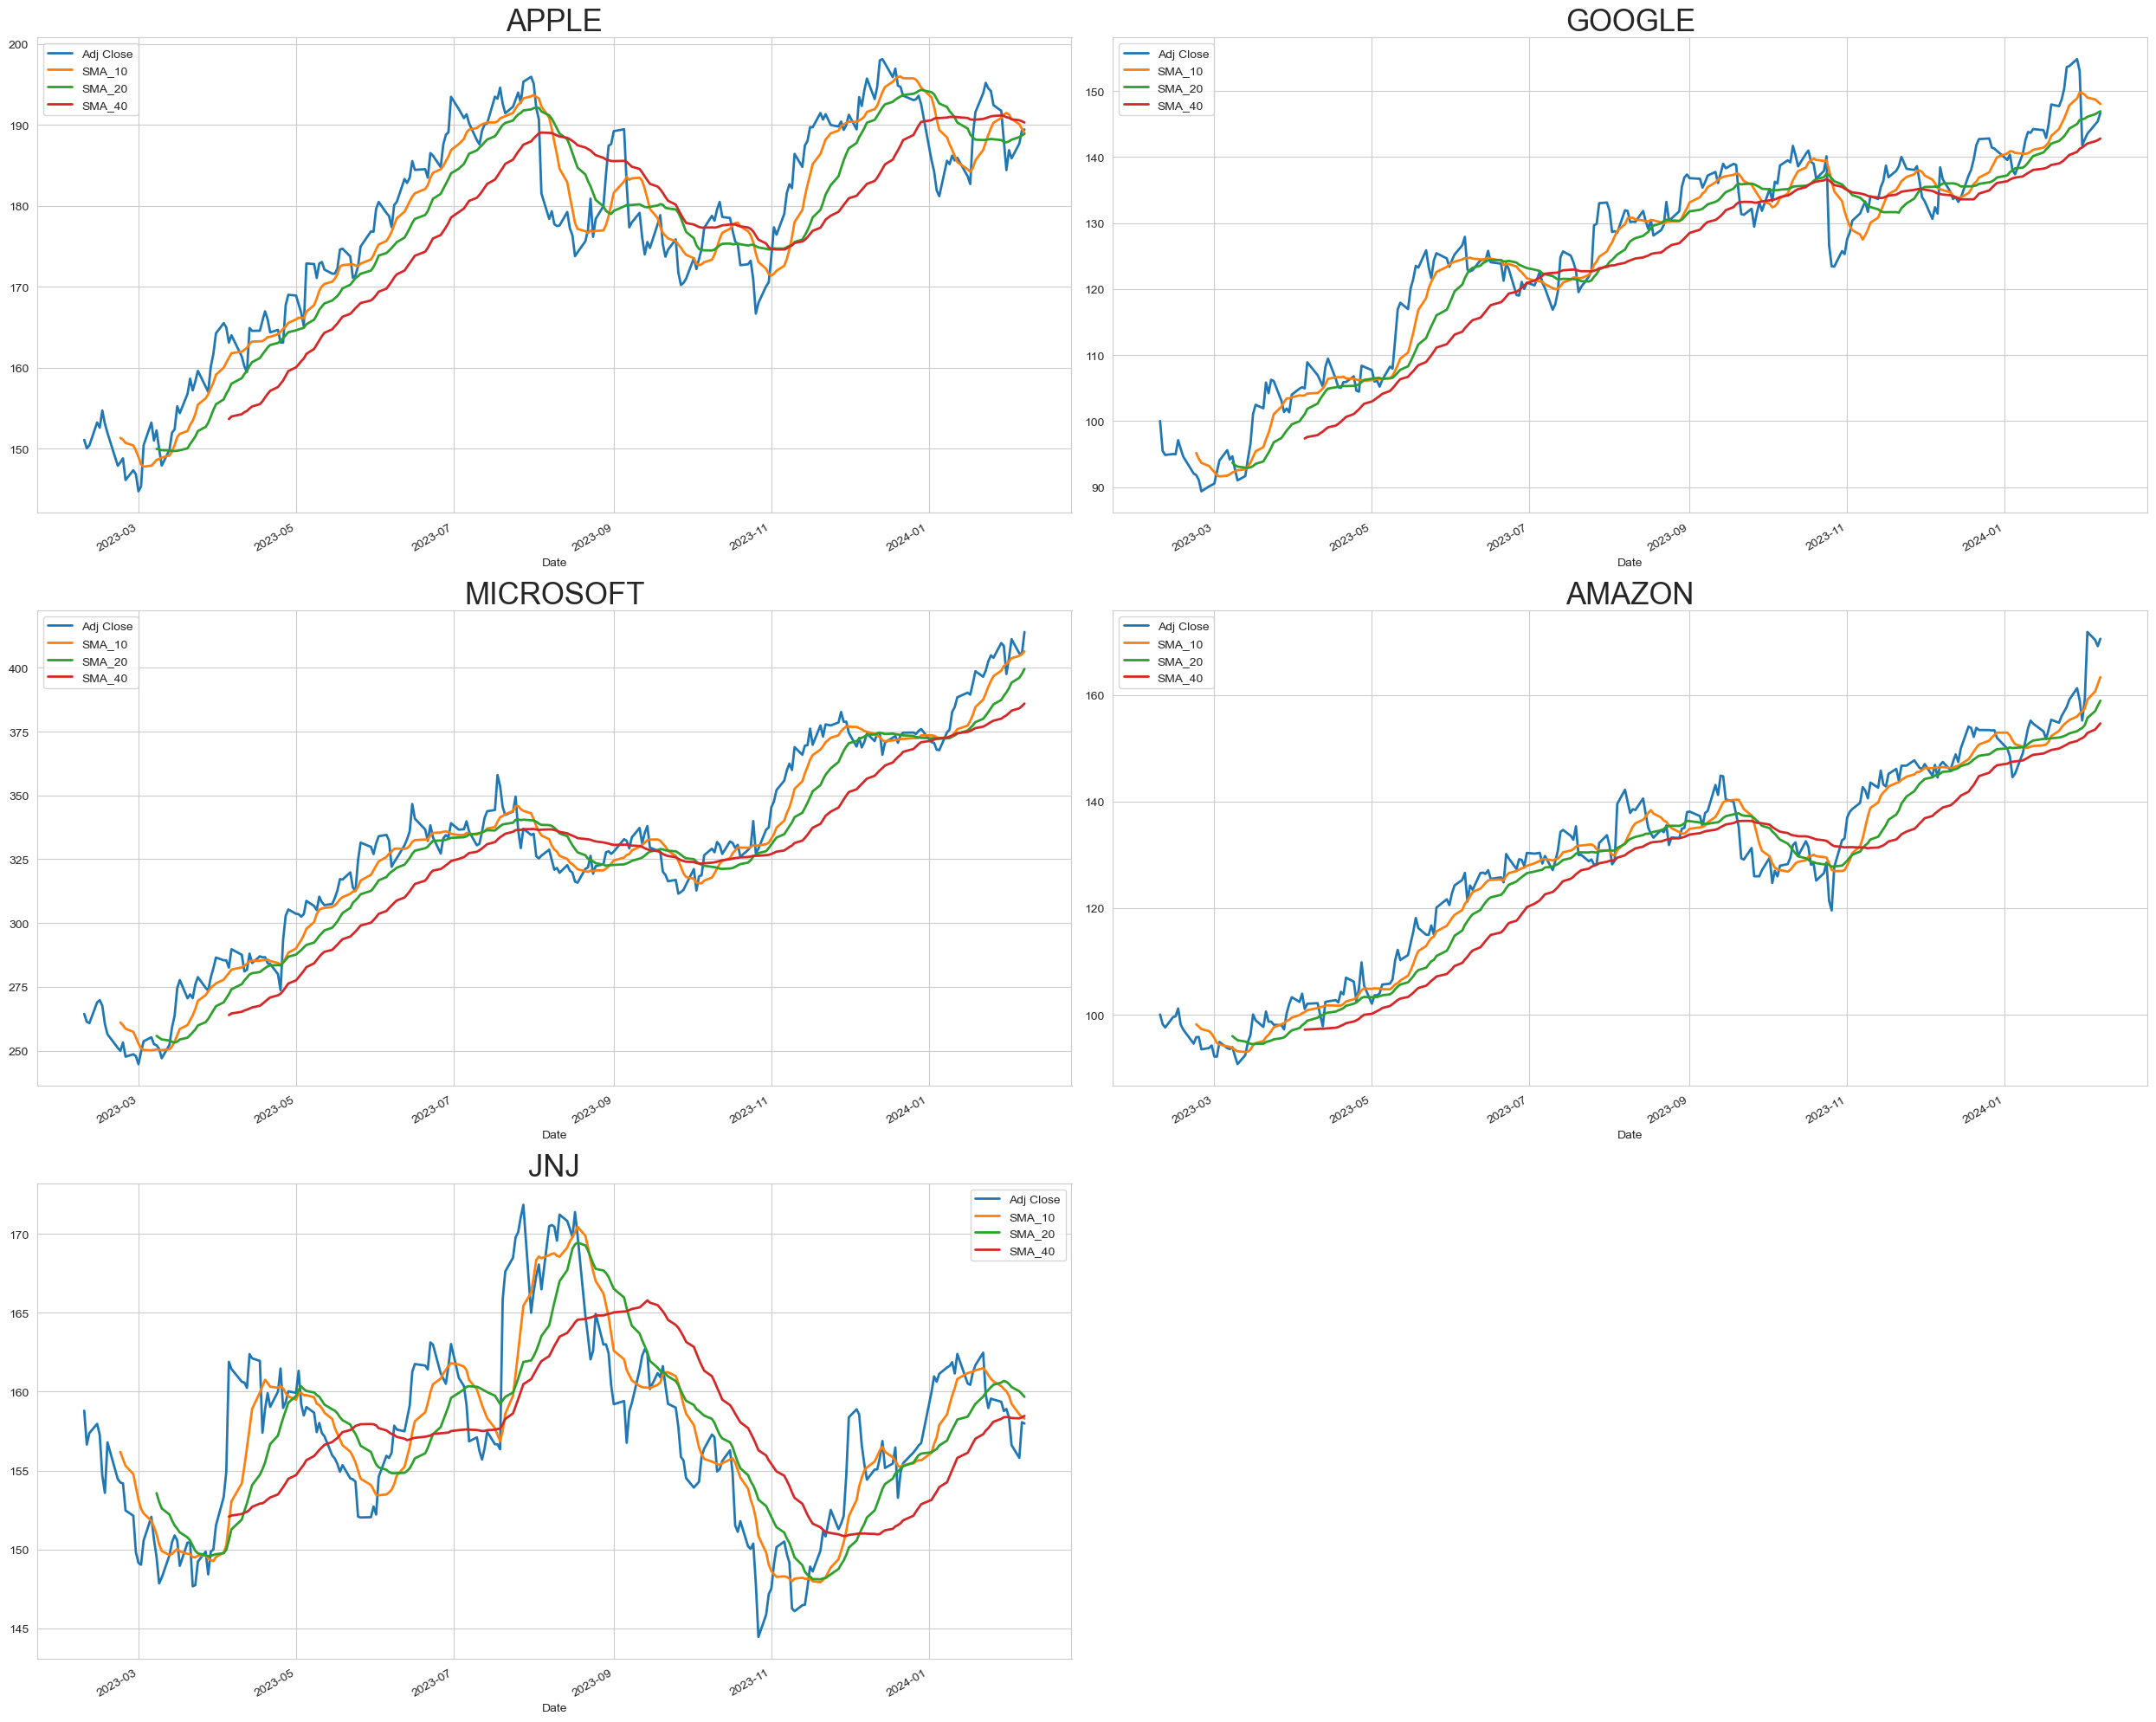

In [6]:
fig, axes = plt.subplots(nrows = 3,ncols = 2)
fig.set_figheight(20)
fig.set_figwidth(25)
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick label
plt.rc('ytick', labelsize=22)    # fontsize of the tick label


AAPL[['Adj Close','SMA_10','SMA_20','SMA_40']].plot(ax = axes[0,0],linewidth=2)
axes[0,0].set_title("APPLE")

GOOG[['Adj Close','SMA_10','SMA_20','SMA_40']].plot(ax = axes[0,1],linewidth=2)
axes[0,1].set_title("GOOGLE")

MSFT[['Adj Close','SMA_10','SMA_20','SMA_40']].plot(ax = axes[1,0],linewidth=2)
axes[1,0].set_title("MICROSOFT")

AMZN[['Adj Close','SMA_10','SMA_20','SMA_40']].plot(ax = axes[1,1],linewidth=2)
axes[1,1].set_title("AMAZON")

JNJ[['Adj Close','SMA_10','SMA_20','SMA_40']].plot(ax = axes[2,0],linewidth=2)
axes[2,0].set_title("JNJ")

fig.delaxes(axes[2][1])
fig.tight_layout()


# 20 days :) 

Strategy

In [7]:
def signals(df):
    df['buy_signal'] = np.where(df['Adj Close'] > df['SMA_20'],1,0)
    df['sell_signal'] = np.where(df['Adj Close'] < df['SMA_20'],1,0)

    df['signal_SMA'] = np.where((df['buy_signal'] == 1) & (df['sell_signal'] == 0),1,0)
    df['signal_SMA'] = np.where((df['sell_signal'] == 1) & (df['buy_signal'] == 0),0,df['signal_SMA'])
    return df
df = signals(df)

In [8]:
# df.drop(columns=['signal','siganl','signall'],inplace =True)

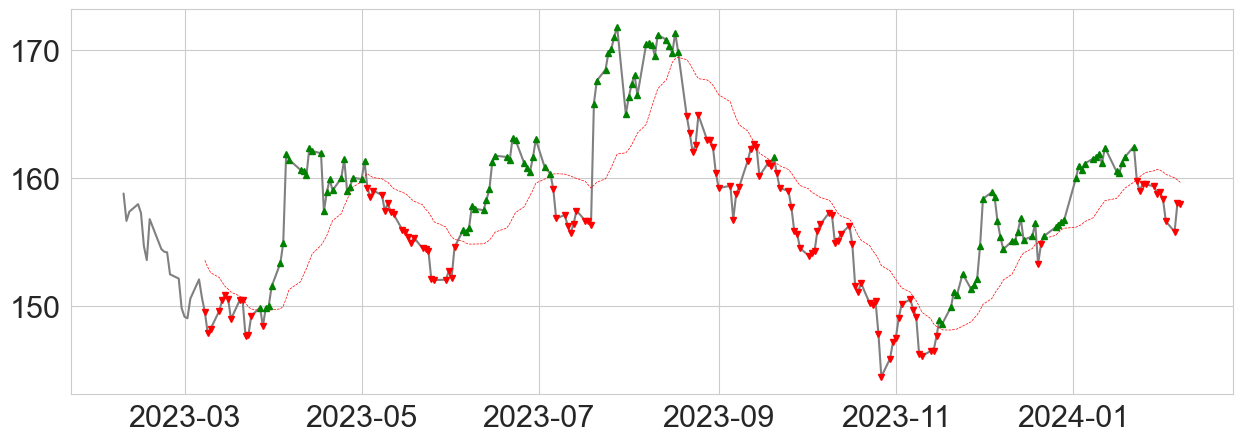

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df['Adj Close'],label ='Adj Close Price',color = 'grey')
plt.plot(df['SMA_20'],label = 'SMA_20',color = 'red' , linestyle = '--',linewidth = 0.5)
plt.plot(df[df['sell_signal'] == 1].index , df['Adj Close'][df['sell_signal'] == 1],marker = 'v' ,markersize =5 ,color = 'r',linestyle = 'None',label='Sell')
plt.plot(df[df['buy_signal'] == 1].index , df['Adj Close'][df['buy_signal'] == 1],marker = '^' ,markersize = 5,color = 'g',linestyle = 'None',label='Sell')